# Estudio de tendencia y estacionalidad con el numero de positivos

Primero importamos los datos

In [2]:
import ast
import pandas as pd
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt

## Carga y exploración inicial de los datos

In [3]:
data_5 = pd.read_csv('data5.csv', parse_dates = [0], index_col = [0], usecols = ['Date', 'Name test','Country', 'City', 'Postal code', 'longitud', 'latitud', 'Valor',       'Cod_prov'])
data_5.shape
data_5.head()

,Name test,Country,City,Postal code,longitud,latitud,Valor,Cod_prov
Date,,,,,,,,
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.294704,41.627626,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295000,41.627454,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.294975,41.627452,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295089,41.627480,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295028,41.627465,Negativo,8.0


In [4]:
data = pd.read_csv("../backend/data/new_data.csv", usecols=["Date","Geo Location","Name test","Value test","Country","City","Postal code"])
data.head()

,Date,Geo Location,Name test,Value test,Country,City,Postal code
0,"﻿""2020-07-20 12:59:04""","{""latitude"":41.6276264,""longitude"":2.2947037}",Leishmania,Negativo,Spain,Barcelona,8520.0
1,"﻿""2020-07-20 12:59:25""","{""latitude"":41.6274545,""longitude"":2.2949996}",Leishmania,Negativo,Spain,Barcelona,8520.0
2,"﻿""2020-07-20 13:18:08""","{""latitude"":41.6274519,""longitude"":2.2949754}",Leishmania,Negativo,Spain,Barcelona,8520.0
3,"﻿""2020-07-20 13:19:02""","{""latitude"":41.6274799,""longitude"":2.2950886}",Leishmania,Negativo,Spain,Barcelona,8520.0
4,"﻿""2020-07-20 13:37:12""","{""latitude"":41.6274648,""longitude"":2.2950282}",Leishmania,Negativo,Spain,Barcelona,8520.0


In [5]:
# Convertir la columna 'Date' a formato de fecha
data["Date"] = pd.to_datetime(
    data["Date"]
        .astype(str) 
        .str.replace('\ufeff', '', regex=True)  
        .str.replace('"', '', regex=True)       
        .str.strip(),                           
    errors='coerce'  
)

# Eliminar filas donde 'Date' no pudo convertirse correctamente
data = data.dropna(subset=["Date"])

print(data["Date"].dtype)  # Verificar el tipo de dato

data.set_index("Date", inplace=True)

data.head()

datetime64[ns]


,Geo Location,Name test,Value test,Country,City,Postal code
Date,,,,,,
2020-07-20 12:59:04,"{""latitude"":41.6276264,""longitude"":2.2947037}",Leishmania,Negativo,Spain,Barcelona,8520.0
2020-07-20 12:59:25,"{""latitude"":41.6274545,""longitude"":2.2949996}",Leishmania,Negativo,Spain,Barcelona,8520.0
2020-07-20 13:18:08,"{""latitude"":41.6274519,""longitude"":2.2949754}",Leishmania,Negativo,Spain,Barcelona,8520.0
2020-07-20 13:19:02,"{""latitude"":41.6274799,""longitude"":2.2950886}",Leishmania,Negativo,Spain,Barcelona,8520.0
2020-07-20 13:37:12,"{""latitude"":41.6274648,""longitude"":2.2950282}",Leishmania,Negativo,Spain,Barcelona,8520.0


In [6]:
data.dropna(subset=["Geo Location"], inplace=True)

# Convertir cada string JSON a diccionario de Python
data["Geo Location"] = data["Geo Location"].apply(ast.literal_eval)

# Extraer latitud y longitud en columnas nuevas
data["latitud"] = data["Geo Location"].apply(lambda x: x["latitude"])
data["longitud"] = data["Geo Location"].apply(lambda x: x["longitude"])

data.drop(columns=["Geo Location"], inplace=True)

data.rename(columns={"Value test": "Valor"}, inplace=True)

data.head()

,Name test,Valor,Country,City,Postal code,latitud,longitud
Date,,,,,,,
2020-07-20 12:59:04,Leishmania,Negativo,Spain,Barcelona,8520.0,41.627626,2.294704
2020-07-20 12:59:25,Leishmania,Negativo,Spain,Barcelona,8520.0,41.627454,2.295
2020-07-20 13:18:08,Leishmania,Negativo,Spain,Barcelona,8520.0,41.627452,2.294975
2020-07-20 13:19:02,Leishmania,Negativo,Spain,Barcelona,8520.0,41.62748,2.295089
2020-07-20 13:37:12,Leishmania,Negativo,Spain,Barcelona,8520.0,41.627465,2.295028


In [7]:
def extract_cod_prov(postal_code):
    if pd.isnull(postal_code):
        return None
    code_str = str(int(postal_code))
    if len(code_str) == 4:
        return int(code_str[0])
    elif len(code_str) == 5:
        return int(code_str[:2])
    else:
        return None

data['Cod_prov'] = data['Postal code'].apply(extract_cod_prov)
data.head()

,Name test,Valor,Country,City,Postal code,latitud,longitud,Cod_prov
Date,,,,,,,,
2020-07-20 12:59:04,Leishmania,Negativo,Spain,Barcelona,8520.0,41.627626,2.294704,8.0
2020-07-20 12:59:25,Leishmania,Negativo,Spain,Barcelona,8520.0,41.627454,2.295,8.0
2020-07-20 13:18:08,Leishmania,Negativo,Spain,Barcelona,8520.0,41.627452,2.294975,8.0
2020-07-20 13:19:02,Leishmania,Negativo,Spain,Barcelona,8520.0,41.62748,2.295089,8.0
2020-07-20 13:37:12,Leishmania,Negativo,Spain,Barcelona,8520.0,41.627465,2.295028,8.0


In [8]:
data['Valor'].value_counts()

Valor
Negativo           33083
Positivo            4012
Invalido             628
Dudoso               435
Inválido             155
Positivo fuerte      149
Error                 28
Name: count, dtype: int64

In [87]:
data_5.head()

,Name test,Country,City,Postal code,longitud,latitud,Valor,Cod_prov
Date,,,,,,,,
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.294704,41.627626,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295000,41.627454,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.294975,41.627452,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295089,41.627480,Negativo,8.0
2020-07-20,Leishmania,Spain,Barcelona,8520.0,2.295028,41.627465,Negativo,8.0


In [88]:
data_5['Valor'].value_counts()

Valor
Negativo    36484
Positivo     4867
Resto        1463
Name: count, dtype: int64

In [89]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42814 entries, 2020-07-20 to 2024-10-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name test    42814 non-null  object 
 1   Country      42814 non-null  object 
 2   City         42814 non-null  object 
 3   Postal code  42811 non-null  float64
 4   longitud     42728 non-null  float64
 5   latitud      42728 non-null  float64
 6   Valor        42814 non-null  object 
 7   Cod_prov     42811 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.9+ MB


## Preprocesamiento de datos borrando las filas sin codigo postal

In [90]:
# Borramos las filas que no tienen CP
data_5.dropna(subset = ['Postal code'], inplace = True)
data_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42811 entries, 2020-07-20 to 2024-10-31
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name test    42811 non-null  object 
 1   Country      42811 non-null  object 
 2   City         42811 non-null  object 
 3   Postal code  42811 non-null  float64
 4   longitud     42725 non-null  float64
 5   latitud      42725 non-null  float64
 6   Valor        42811 non-null  object 
 7   Cod_prov     42811 non-null  float64
dtypes: float64(4), object(4)
memory usage: 2.9+ MB


In [91]:
df = data_5[(data_5['Name test'] == 'Leishmania') & (data_5['Valor'] == 'Positivo')].sort_index()
df

,Name test,Country,City,Postal code,longitud,latitud,Valor,Cod_prov
Date,,,,,,,,
2020-07-21,Leishmania,Spain,Barcelona,8520.0,2.295092,41.627462,Positivo,8.0
2020-07-21,Leishmania,Spain,Barcelona,8520.0,2.295037,41.627451,Positivo,8.0
2020-07-21,Leishmania,Spain,Barcelona,8520.0,2.295067,41.627487,Positivo,8.0
2020-07-21,Leishmania,Spain,Barcelona,8520.0,2.294997,41.627520,Positivo,8.0
2020-07-22,Leishmania,Spain,Barcelona,8520.0,2.294814,41.627585,Positivo,8.0
...,...,...,...,...,...,...,...,...
2024-10-30,Leishmania,Spain,Huelva,21007.0,-6.924613,37.259517,Positivo,21.0
2024-10-30,Leishmania,Spain,Jaén,23320.0,-3.292525,38.035989,Positivo,23.0
2024-10-31,Leishmania,Spain,Tarragona,43580.0,0.736036,40.718648,Positivo,43.0


## Comparamos los datos por años con los datos por semanas

### Agrupacion mensual

In [92]:
import calendar
import locale

# set the locale to Spain
locale.setlocale(locale.LC_TIME, "es_ES")
months_list = [calendar.month_name[i].title() for i in range(1, 13)]


import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

df['year'] = df.index.year
anual = df.groupby(['year', pd.Grouper(freq = 'MS')]).City.count().reset_index()
anual['month']= anual.Date.dt.month
anual = anual.pivot_table(index = 'month', columns = 'year', values= 'City', aggfunc='sum').fillna(0)

data= []
for col in anual.columns:
    trace = go.Scatter(
        x = anual.index,
        y = anual[col],
        name = col,
    # IMPORTANTE: establecemos que es un gráfico de líneas
        mode = 'lines'
    )

    data.append(trace)

layout = dict(
            title = dict( text = "Casos mensuales por año" ),
            # Configuración del eje X
            xaxis = dict(
               title = dict( text = "Month" ),

               # vamos a poner marcas en los valores entre 0 y 6 (incluido)
               tickvals = list(range(1,13)),

               # Cada marca se corresponderá con un día de la semana
               ticktext = months_list
            ),
         )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [93]:
import calendar
import locale

# set the locale to Spain
locale.setlocale(locale.LC_TIME, "es_ES")
months_list = [calendar.month_name[i].title() for i in range(1, 13)]


data= []
for col in anual.columns:
    trace = go.Bar(
        x = anual.index,
        y = anual[col],
        name = col
    )
    data.append(trace)

# Creamos el layout
layout = dict(
            # Título
            title = dict( text = "Casos de Leishmania mensual " ),
    # Configuración del eje X
            xaxis = dict(
               title = dict( text = "Month" ),

               # vamos a poner marcas en los valores entre 0 y 6 (incluido)
               tickvals = list(range(1,13)),

               # Cada marca se corresponderá con un día de la semana
               ticktext = months_list
            ),
         )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [94]:
estadisticos = anual.describe().T.loc[:,'min': 'max']
estadisticos

,min,25%,50%,75%,max
year,,,,,
2020,0.0,0.00,0.0,0.25,8.0
2021,0.0,1.00,8.0,40.25,70.0
2022,61.0,81.75,103.0,124.25,174.0
2023,35.0,100.25,116.0,137.75,168.0
2024,0.0,13.00,69.5,120.50,128.0


### Agrupación semanal

In [95]:
df['year'] = df.index.year
week = df.groupby(['year', pd.Grouper(freq = 'W')]).Valor.count().reset_index()
week['week'] = week['Date'].dt.isocalendar().week
week = week.pivot_table(index = 'week', columns = 'year', values= 'Valor', aggfunc='sum').fillna(0)

data= []
for col in week.columns:
    trace = go.Scatter(
        x = week.index,
        y = week[col],
        name = col,
    # IMPORTANTE: establecemos que es un gráfico de líneas
        mode = 'lines'
    )

    data.append(trace)

layout = dict(
            title = dict( text = "Casos semanales por año" ),
            # Configuración del eje X
            xaxis = dict(

            ),
         )
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Los años 2020 y 2021  tienen pocos datos y son diferentes al resto. 2022 y 2323 son años con un poco más de actividad.

Se eligió los datos por semanas por peticion de Irene

## Estudio de estacionalidad semanal usando el numero de casos

En esta sección se analizará la estacionalidad semanal del numero de positivos de Leishmania. Se utilizarán herramientas estadísticas, como la descomposición de la serie y el análisis de autocorrelación.

**Bibliografía:**

- https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf
- https://machinelearningmastery.com/time-series-data-stationary-python/
- https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

Calculamos el número de casos por semanas:

In [96]:
week = df.groupby([ pd.Grouper(freq = 'W')]).Valor.count()
week

Date
2020-07-26     8
2020-08-02     0
2020-08-09     1
2020-08-16     0
2020-08-23     0
              ..
2024-10-06    28
2024-10-13    25
2024-10-20    26
2024-10-27    29
2024-11-03    17
Freq: W-SUN, Name: Valor, Length: 224, dtype: int64

In [97]:
# Aplicamos test de estacionalidad

from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("RESULTADO: Stationary")
    else:
        print("RESULTADO: Non-stationary")

check_stationarity(week)

ADF Statistic: -2.414806
p-value: 0.137601
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574
RESULTADO: Non-stationary


No se observa evidencia clara de estacionalidad en la serie temporal, ya que el p-value obtenido en la prueba de Dickey-Fuller Aumentada (ADF) es mayor a 0.05. Esto indica que no podemos rechazar la hipótesis nula de no estacionariedad, por lo que la serie presenta un comportamiento aleatorio sin patrones estacionales definidos.

### Descomposicion

En esta sección se analizará la serie temporal semanal de la tasa de positivos de Leishmania mediante técnicas de descomposición. El objetivo es separar la serie en sus componentes principales: tendencia, estacionalidad y residuo. Esto permite identificar patrones subyacentes y comprender mejor la estructura de la serie antes de aplicar modelos de predicción o realizar análisis adicionales.

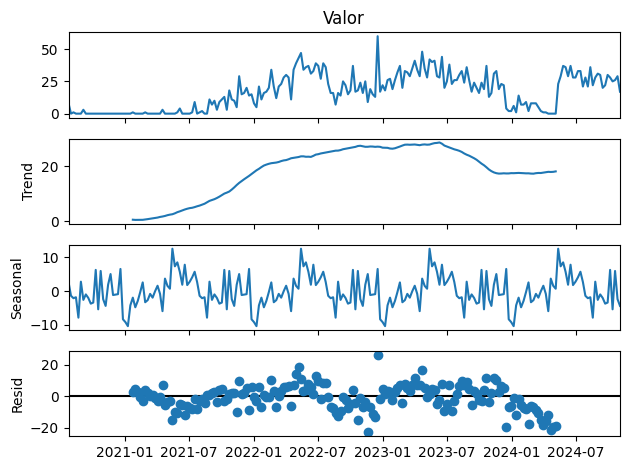

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(week, model='additive', period=52)
result.plot()
plt.show()

### Estudio de autocorrelación y autocorrelación parcial

La autocorrelación representa la correlación entre una secuencia y sí misma. Podemos hacer un análisis de autocorrelación para ver si los datos se correlacionan con la misma serie desplazada 1 semana, 2 semanas, 3 semanas, etc. A lo mejor podríamos ver que si en un año X el calor llega más tarde, los casos de Leishmania aparecen también más tarde en el año Y. Veríamos estacionalidad anual si en la semana 52 (más o menos) se ve un pico alto.

La secuencia de hace varios períodos atrás se llama “retraso” o “lag” en inglés, porque es una versión retrasada de la original.

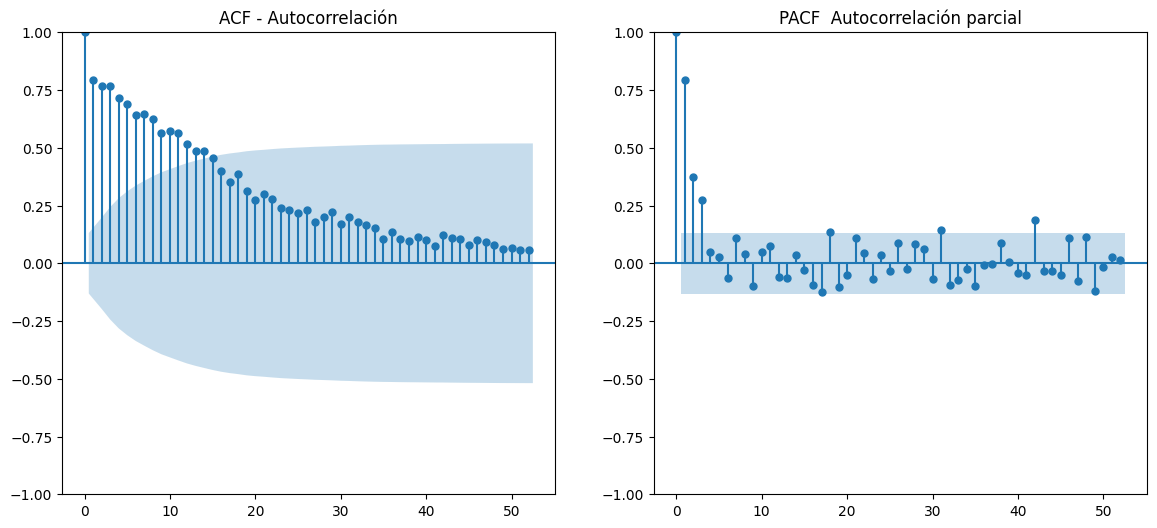

In [99]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
#from pmdarima import auto_arima

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  #

plot_acf(week, lags=52, ax = axes[0])  # mirar hasta 3 años
axes[0].set_title('ACF - Autocorrelación')


# Graficar PACF
plot_pacf(week, lags=52, ax = axes[1])  # lags es cuántos lags se muestran
axes[1].set_title('PACF  Autocorrelación parcial');

Este gráfico sugiere que nuestra serie temporal sigue un patrón de tipo "random walk", es decir, que los cambios en la serie temporal son aleatorios. Los random walks no son estacionarios, pero pueden volverse estacionarias al diferenciar.

En el gráfico izquierdo, los valores en el eje x representan los retrasos en semanas, que en este caso van hasta 70. En el eje Y tenemos los valores para el coeficiente de autocorrelación. La correlación solo puede tomar valores entre -1 y 1.
Las líneas en el gráfico representan la autocorrelación entre el número de casos y una versión retrasada de de la serie. La primera línea indica la autocorrelación del mes con sigo mismo, la segunda línea representa la autocorrelación de la serie, con la serie con una semana de retraso, y así sucesivamente. La primera línea es uno porque la correlación entre un valor y sí mismo siempre será uno.

El área azul alrededor del eje X representa la significación de los valores de autocorrelación. Es decir, mide si son significativamente distintos de cero, lo que sugiere la existencia de autocorrelación para ese retraso específico.

Lo que podemos ver, es que solo hay una correlación fuerte con las semanas  anteriores, es decir, el valor actual depende del valor anterior (2 valores anteriores). Si vemos la autocorrelación parcial (derecha), vemos que efectivamente solo hay correlación con el dato de la semana anterior.


__Conclusión__: es difícil de modelar este tipo de series temporales y no puede ser fácilmente predicho. De hecho, la mejor predicción es la que se obtiene de la semana anterior.

### Estudio de las diferencias

Vamos a calcular la serie de la primera diferencia (diferencia con respecto al mes anterior):

In [100]:
# Como la serie no es estacionaria, podemos aplicar diferenciación
# Realizar una diferenciación simple
w_diff = week.diff().dropna()

# Comprobar si después de la diferenciación la serie es estacionaria
check_stationarity(w_diff)

ADF Statistic: -17.445696
p-value: 0.000000
Critical Values:
	1%: -3.460
	5%: -2.875
	10%: -2.574
RESULTADO: Stationary


Las diferencias son estacionales. Ahora vemos la autocorrelación:

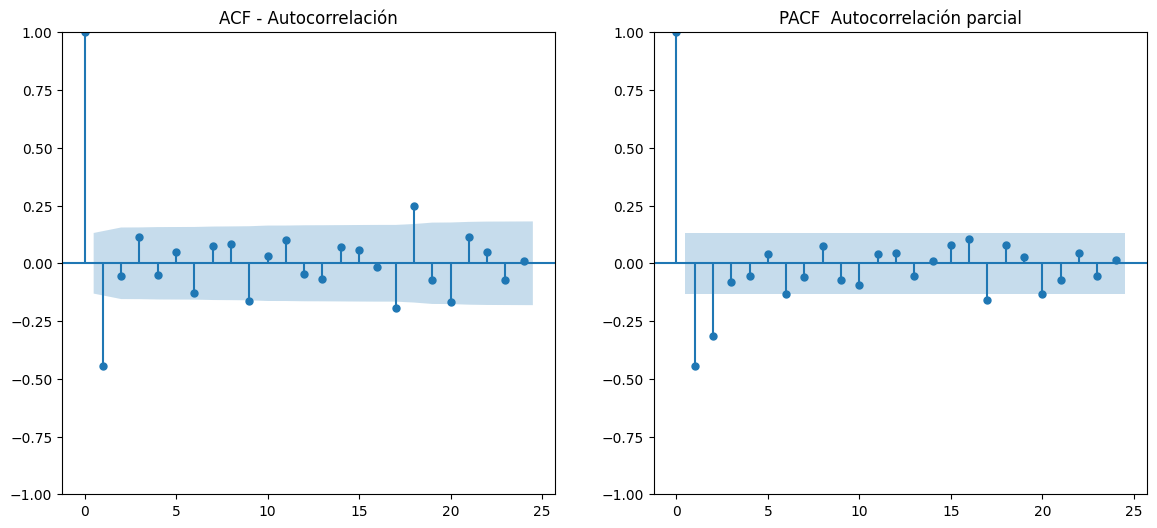

In [101]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  #

plot_acf(w_diff, lags=24, ax = axes[0])  # mirar hasta 3 años
axes[0].set_title('ACF - Autocorrelación')


# Graficar PACF
plot_pacf(w_diff, lags=24, ax = axes[1])  # lags es cuántos lags se muestran
axes[1].set_title('PACF  Autocorrelación parcial');

En este caso, los valores de la autocorrelación son pequeños, cercanas a cero y por debajo de los niveles de confianza del 95 %

## Estudio del modelo
Aunque se ha determinado que ARIMA no es el modelo óptimo, se realizará una predicción.


Para este tipo de series temporales, podemos usar modelo ingenuo basado símplemente en el valor anterior. Por ejemplo: ARIMA(0,1,0)

$$ y_t = y_{t-1} + \epsilon$$

También podemos calcular los mejores hiperparámetros para ARIMA:

In [102]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")


best_aic = np.inf
best_order = None
best_model = None

# Define rangos posibles para p, d, q
p_range = range(0, 4)
d_range = range(0,4)
q_range = range(0, 4)

# Grid search
for p in p_range:
    for d in d_range:
        for q in q_range:
            try:
                model = ARIMA(week, order=(p, d, q)).fit()
                if model.aic < best_aic:
                    best_aic = model.aic
                    best_order = (p, d, q)
                    best_model = model
            except:
                continue

print(f"Mejor modelo ARIMA: {best_order} con AIC = {best_aic:.2f}")


Mejor modelo ARIMA: (2, 1, 3) con AIC = 1537.07


* p = 2: número de retardos autorregresivos (AR). El modelo se basa en las 2 observaciones anteriores para predecir la siguiente.
* d = 1: número de diferenciaciones necesarias para hacer la serie estacionaria (I, de "Integrated"). Se aplicó una diferencia de orden 1 (por ejemplo, data.diff(1)) antes de modelar.
* q = 3: número de términos del promedio móvil (MA). Usa los últimos 3 errores del modelo (residuos) para mejorar la predicción.

In [103]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(week, order=(2, 1, 3))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Valor   No. Observations:                  224
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -762.533
Date:               ju., 28 ago. 2025   AIC                           1537.066
Time:                        11:02:33   BIC                           1557.509
Sample:                    07-26-2020   HQIC                          1545.318
                         - 11-03-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2683      0.059     -4.562      0.000      -0.384      -0.153
ar.L2         -0.9448      0.051    -18.510      0.000      -1.045      -0.845
ma.L1         -0.3482      0.087     -4.011      0.0

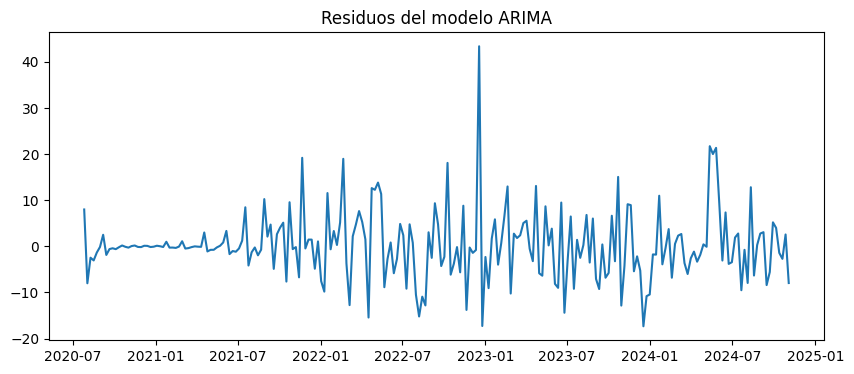

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(results.resid)
plt.title("Residuos del modelo ARIMA")
plt.show()

Los residuos tienen “explosiones” de varianza en ciertos períodos (es decir, más dispersión en algunos tramos),  lo que sugiere heterocedasticidad (la varianza no es constante)

* Log-Likelihood: cuanto más cercano a 0 mejor
* sigma2: valor muy alto (esto es malo e indica que hay mucha aleatoriedad). p-value = 0 <  0.001 (significativo)
* Residuos:
    * No hay correlación entre los residuos . (Ljung-Box). Esto es bueno
    * No hay normalidad de residuos (Jarque-Bera (__esto es malo__)). Lo chequeamos con shapiro a continuación
    * No parece que  hay Heterocesasticiadad (varianza es constante, lo que es bueno) . Lo vemos a continuación

El análisisi de residuos concluye que este modelo no captura bien la estructura de los datos

In [105]:
from statsmodels.stats.diagnostic import acorr_ljungbox

ljung_box = acorr_ljungbox(results.resid, lags=[52], return_df=True)

print(ljung_box)

      lb_stat  lb_pvalue
52  65.392211   0.100447


p-valor ≥ 0.05, no hay evidencia de autocorrelación

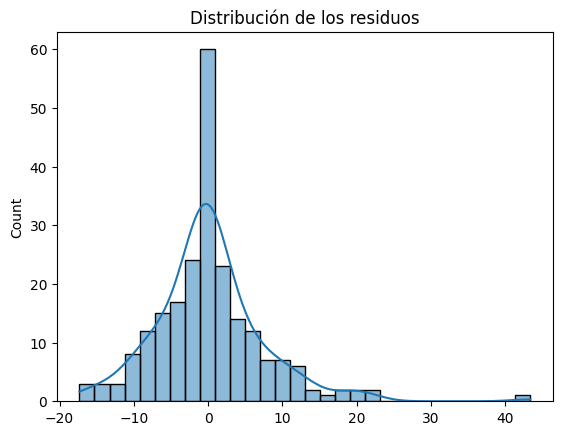

p-valor Shapiro-Wilk: 0.0000
residuos no normales


In [106]:
# analisis de residuos
import seaborn as sns
from scipy.stats import shapiro

# Histograma con curva KDE
sns.histplot(results.resid, kde=True)
plt.title("Distribución de los residuos")
plt.show()

# Prueba de Shapiro-Wilk
stat, p = shapiro(results.resid)
print(f"p-valor Shapiro-Wilk: {p:.4f}")

if p > 0.05:
    print("residuos aproximadamente normales")
else:
    print("residuos no normales")


In [107]:
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(results.resid)
print(f"ARCH Test p-valor: {arch_test[1]:.4f}")

if arch_test[1] > 0.05:
    print("(varianza constante)")
else:
    print("heterocedasticidad (varianza no constante)")

ARCH Test p-valor: 0.4022
(varianza constante)


## Predicciones

Predicciones:
 2024-09-01    28.663433
2024-09-08    25.980860
2024-09-15    28.293957
2024-09-22    26.893683
2024-09-29    27.335638
2024-10-06    27.590723
2024-10-13    27.001947
2024-10-20    27.610194
2024-10-27    27.173319
2024-11-03    27.377981
Freq: W-SUN, Name: predicted_mean, dtype: float64

Intervalos de confianza:
             lower Valor  upper Valor
2024-09-01    13.773746    43.553119
2024-09-08    10.014496    41.947224
2024-09-15    11.359505    45.228409
2024-09-22     8.588217    45.199149
2024-09-29     8.267815    46.403460
2024-10-06     7.397854    47.783592
2024-10-13     5.961849    48.042044
2024-10-20     5.707073    49.513316
2024-10-27     4.384250    49.962387
2024-11-03     3.831422    50.924539


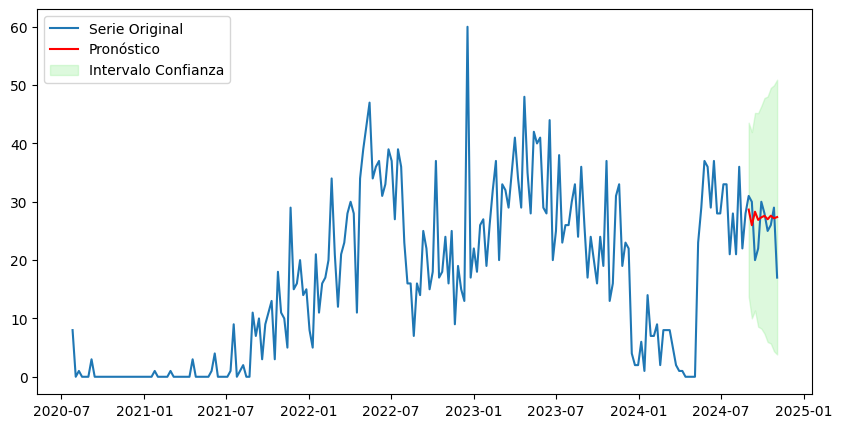

In [108]:
# Ajustamos el modelo ARIMA
# entrenamos el modelo con 10 semanas menos
model = ARIMA(week.iloc[:-10], order=(2, 1, 3))
model_fit = model.fit()

# Predicciones futuras (por ejemplo, 6 pasos adelante)
forecast = model_fit.get_forecast(steps=10)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Mostrar resultados
print("Predicciones:\n", predicted_mean)
print("\nIntervalos de confianza:\n", conf_int)

#  Pintamos los resultados de la predicción
plt.figure(figsize=(10, 5))
plt.plot(week, label='Serie Original')
plt.plot(predicted_mean.index, predicted_mean, label='Pronóstico', color='red')
plt.fill_between(predicted_mean.index,
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1],
                 color='lightgreen', alpha=0.3, label='Intervalo Confianza')
plt.legend()
plt.show()

__Conclusion__

Aunque el modelo ARIMA(2, 1, 3) es el que mejor se ajusta según el AIC, la evaluación de los residuos muestra limitaciones importantes. Los residuos no son normales y presentan "explosiones" de varianza, lo que indica que el modelo no captura toda la complejidad y aleatoriedad de la serie de casos de Leishmania. No se detecta autocorrelación ni heterocedasticidad significativa según las pruebas estadísticas, pero la variabilidad no constante y la naturaleza de "random walk" dificultan la predicción precisa con modelos lineales como ARIMA. Por tanto, aunque ARIMA ayuda a entender ciertas dependencias temporales, su capacidad predictiva es limitada y podrían requerirse modelos más avanzados para series con alta aleatoriedad y variabilidad.